필수알고리즘with파이썬_3
=======================

# LESSON 03 연결리스트
3.1 연결 리스트(Linked List)란?  
3.2 연결 리스트의 삽입과 삭제 알고리즘  
3.3 정리

## 3.1 연결 리스트(Linked List)란?

- 연결 리스트는 대부분의 알고리즘에서 사용하는 기본 자료구조이다. 알고리즘에서 사용하는 데이터와 다음 노드를 가리키는 링크를 묶어서 노드로 정의하여 사용한다.


## 3.1.1 노드(Node)와 링크(Link)

- 파이썬에서 연결 리스트를 사용하기 위해서 노드(Node)를 다음과 같이 클래스로 정의하여 사용한다.


In [1]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

- 이 Node 클래스는 데이터를 저장하는 data와 링크를 저장하는 next를 멤버로 갖고 있다.


- 이러한 형태의 노드를 묶어서 연결 리스트의 형태로 표현하면 다음과 같이 된다.

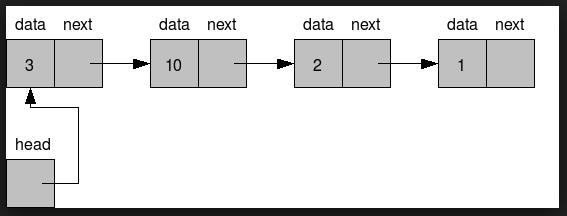
그림1. 이처럼 자신의 노드에서 다음의 노드만을 가리킬 수 있는 형태가 전형적인 연결 리스트의 형태다.

### 3.1.2 연결 리스트의 특징
- 연결 리스트는 자료를 저장하는 하나의 자료구조다. 기본적인 개념은 파이썬의 배열과 거의 동일하다.

- 그렇다면 왜 배열을 사용하지 않고 연결 리스트를 사용할까?

- 배열의 특징은 배열을 생성할 때 한번에 총 메모리를 확보하여 사용할 수 있도록 하기 때문에 프로그램이 실행되는 중간에 배열의 크기를 바꾸거나 할 수가 없다.
- 따라서 배열의 단점은 배열 안에 저장되어 있는 값들을 정렬할 때도 일일이 메모리에 저장되어 있는 값을 바꾸어주어야 한다. 연결 리스트는 이와 같은 배열의 단점을 해결해준다.

- 배열은 연속된 메모리를 사용하지만 연결 리스트는 반드시 연속적이라고는 볼 수 없다. 오히려 연결 리스트는 연속적이지 않는 데이터들을 링크로 서로 연결하는 개념이라고 볼 수 있다.

## 3.2 연결 리스트의 삽입과 삭제 알고리즘

### 3.2.1. 연결 리스트의 초기화


- 연결 리스트를 활용한 여러 알고리즘을 보기 전에 2개 이상의 데이터(data, next)를 노드에 저장하여 서로 연결하게 하는 연결리스트의 초기화에 대해 알아보자.  
 
 
 4개의 노드가 연결된 연결 리스트를 만들기 위해서 다음과 같은 파이썬 코드를 작성해야 한다.  
 연결 리스트를 초기화하는 기능을 가진 함수를 init_list()라고 하자.

In [2]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_C = Node("C")
    node_D = Node("D")
    node_A.next = node_B
    node_B.next = node_C
    node_C.next = node_D
    
def print_list():
    global node_A
    node =  node_A
    while node:
        print(node.data)
        node = node.next

In [3]:
init_list()
print_list()

A
B
C
D


### 3.2.2 연결 리스트의 삽입 알고리즘


- 배열과는 다르게 연결 리스트는 각각의 노드가 링크로 연결되어 있다. 따라서 연결 리스트의 중간에 어떤 값을 노드에 연결시키는 것도 간단하다.

In [4]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_D = Node("D")
    node_E = Node("E")
    node_A.next = node_B
    node_B.next = node_D
    node_D.next = node_E
        
def insert_node(data):
    global node_A
    
    new_node = Node(data)
    node_P = node_A
    node_T = node_P.next
    while node_T.data <= data:
        node_P = node_T
        node_T = node_T.next
    new_node.next = node_T
    node_P.next = new_node

def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next

In [5]:
print("연결 리스트 초기화 후")
init_list()
print_list()
print("노드 C를 추가한 후")
insert_node("C")
print_list()

연결 리스트 초기화 후
A
B
D
E
노드 C를 추가한 후
A
B
C
D
E


만약 "C"가 아니라 "E"보다 큰 알파벳이 나오면 오류가 남.  
이 알고리즘은 "삽입"알고리즘이기 때문에 중간이 있을 때만 잘 돌아감.  
같은 이유로 "A"보다 작은 알파벳(아스키코드의 순서)이 나오면 결과가 제대로 나오지 않음.

### 3.2.2 삽입 알고리즘의 분석
1. 시간의 효율성  
데이터나 노드를 삽입하기 위해서는 삽입할 데이터의 위치 검색 과정과 실제 데이터를 삽입하는 과정이 필요하다. 삽입할 데이터의 위치 검색 과정에서는 배열과 연결 리스트의 차이가 많이 없지만, 실제 데이터를 삽입하는 과정은 전체 배열의 크기가 커질수록, 연결 리스트의 노드의 수가 많을 수 록, 현격한 차이를 보여준다.
2. 공간의 효율성  
배열은 실제 프로그래밍에서 사용할 때 프로그램의 실행 중에 배열의 크기를 변경시키지 못하기 때문에 공간의 효율성이 떨어진다. 하지만 연결 리스트는 언제든지 필요할 때 동적으로 공간을 할당하여 사용할 수 있으므로 배열에 비해 공간의 효율성이 뛰어나다고 할 수 있다.
3. 코드의 효율성  
코드의 효율성은 연결 리스트보다 배열이 조금 더 낫다고 볼 수도 있다. 그 이유는 배열의 경우 for문에서 사용하는 것처럼 배열의 인덱스만으로도 가능하기 때문에 코드를 작성할 때도 간단하고, 코드를 이해하기도 훨씬 수월하다. 그에 비해서 연결 리스트의 코드는 포인터와 구조체로 되어 있기 때문에 이해하기 쉽지 않다.

### 3.2.3 연결 리스트의 삭제 알고리즘

In [6]:
class Node:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

def init_list():
    global node_A
    node_A = Node("A")
    node_B = Node("B")
    node_D = Node("D")
    node_E = Node("E")
    node_A.next = node_B
    node_B.next = node_D
    node_D.next = node_E
    
def delete_node(del_data):
    global node_A
    pre_node = node_A
    next_node = pre_node.next
    if pre_node.data == del_data:
        node_A = next_node
        del pre_node
        return
    while next_node:
        if next_node.data == del_data:
            pre_node.next = next_node.next
            del next_node
            break
        pre_node = next_node
        next_node = next_node.next
        
def insert_node(data):
    global node_A
    
    new_node = Node(data)
    node_P = node_A
    node_T = node_P.next
    while node_T.data <= data:
        node_P = node_T
        node_T = node_T.next
    new_node.next = node_T
    node_P.next = new_node

def print_list():
    global node_A
    node = node_A
    while node:
        print(node.data)
        node = node.next

In [7]:
print("연결 리스트 초기화 후")
init_list()
print_list()
print("노드 C를 추가한 후")
insert_node("C")
print_list()
print("노드 D를 삭제한 후")
delete_node("D")
print_list()

연결 리스트 초기화 후
A
B
D
E
노드 C를 추가한 후
A
B
C
D
E
노드 D를 삭제한 후
A
B
C
E


### 3.2.4 삭제 알고리즘의 분석
1. 시간의 효율성  
연결 리스트의 삽입 알고리즘과 마찬가지로 삭제 알고리즘도 삭제할 노드를 검색하는 과정과 찾은 노드를 삭제하는 과정이 필요하다. 배열은 데이터를 삭제한 후 삭제한 데이터 이후의 데이터들을 모두 앞으로 한 칸씩 이동해야 한다. 하지만 연결 리스트는 링크를 끊어주고 삭제할 노드만을 해제해주면 된다. 
2. 공간의 효율성   
삽입 알고리즘과 비슷한 이유로 연결 리스트가 공간의 효율성이 높다.
3. 코드의 효율성  
삽입 알고리즘과 비슷한 이유로 배열이 좀 더 낫다.

## 3.3 정리

 Lesson 3에서는 본격적인 알고리즘으로 들어가기 전에 프로그래밍에서 가장 많이 사용하는 자료구조인 연결 리스트에 대해서 배웠다.  

 연결 리스트는 간단하게 링크가 하나만 존재하는 단일 연결 리스트와 링크가 2개 존재하는 이중 연결 리스트가 존재한다.

그림 출처 http://luckyyowu.tistory.com/324